Dalsza analiza dla Music Tracks with an Upward Trend.csv

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
songs=pd.read_csv('src\csv\Music Tracks with an Upward Trend.csv')

In [60]:
print(songs.describe())

         Popularity  Artist_followers  danceability     energy        key  \
count     47.000000      4.700000e+01     47.000000  47.000000  47.000000   
mean   16093.671277      7.840574e+06      0.702000   0.695426   5.468085   
std    13303.082229      1.029317e+07      0.123394   0.134657   4.020875   
min      181.000000      1.893300e+04      0.386000   0.362000   0.000000   
25%     7554.875000      3.403210e+05      0.644500   0.615500   1.500000   
50%    11081.000000      1.627011e+06      0.731000   0.724000   6.000000   
75%    21990.600000      1.539763e+07      0.789500   0.795000   9.000000   
max    61626.050000      3.072308e+07      0.920000   0.874000  11.000000   

        loudness       mode  speechiness  acoustics  instrumentalness  ...  \
count  47.000000  47.000000    47.000000  47.000000         47.000000  ...   
mean   -5.821489   0.531915     0.103655   0.181823          0.004182  ...   
std     2.054291   0.504375     0.088935   0.238502          0.021939  .

In [67]:
min_liveliness = songs['liveliness'].min()
max_liveliness = songs['liveliness'].max()
avg_liveliness = songs['liveliness'].mean()

print(f'Wartość minimalna: {min_liveliness}')
print(f'Wartość maksymalna: {max_liveliness}')
print(f'Średnia żywotność: {avg_liveliness}')

Wartość minimalna: 0.0489
Wartość maksymalna: 0.353
Średnia żywotność: 0.1225808510638298


In [69]:
min_duration_min = songs['duration_ms'].min() / 60000
max_duration_min = songs['duration_ms'].max() / 60000
avg_duration_min = songs['duration_ms'].mean() / 60000

print(f'Wartość minimalna: {min_duration_min} minut')
print(f'Wartość maksymalna: {max_duration_min} minut')
print(f'Średni czas trwania piosenki: {avg_duration_min} minut')

Wartość minimalna: 2.3421 minut
Wartość maksymalna: 4.525333333333333 minut
Średni czas trwania piosenki: 3.2006226950354613 minut


Głośność utrzymała się na średnim poziomie -5.8 dB. 

Piosenki posiadają niski średni współczynnik „żywotności”, co oznacza, iż niewielka część próby została nagrana z udziałem publiczności.

Długość piosenek w przeliczeniu na minuty wynosi średnio 3,2 minut. Najkrótsza pozycja trwa zaledwie 2,3 minuty, natomiast najdłuższa 4,53 minuty.

Średnie wartości atrybutów danceability i energ wynoszą odpowiednio 0,702 i 0,695. Oznacza to, że średnio utwory są dość taneczne i energetyczne.

Wartości nastroju (joy, sadness, surprise, trust, negative, positive) wydają się zróżnicowane, co sugeruje różnorodność nastrojów w analizowanych utworach.

Inne cechy:

Wartości akustyki (acoustics) są zróżnicowane - średnio wynoszą 0,18, ale widzimy dużą zmienność w tych danych (wysokie odchylenie standardowe).Maxymalna wartość na poziomie 0,78 mninimalna 0,001 Dane te wskazują na rzadkie wykorzystanie tej techniki produkcji

Wartości instrumentalności wydają się być niskie średnio (0,004), co sugeruje, że większość utworów ma niski poziom instrumentalności.

Z przeprowadzonej analizy wynika, że istotnymi cechami współczesnych utworów muzycznych wpływającymi na ich popularność są: energiczność i taneczność. W związku z powyższym można stwierdzić, że odbiorcom podobają się utwory dynamiczne, przy których można się dobrze bawić.

In [75]:
column_names = {
    51: 'positive',
    50: 'negative',
    16: 'liveliness',
    14: 'acoustics',
    15: 'instrumentalness',
    13: 'speechiness',
}
for column_number, column_name in column_names.items():
    songs[column_name] = pd.to_numeric(songs[column_name], errors='coerce')

selected_columns = list(column_names.values())
selected_columns.append('Popularity')

subset_df = songs[selected_columns]

correlation_matrix = subset_df.corr()
correlation_text = correlation_matrix.to_string()

print("Macierz korelacji:")
print(correlation_text)

Macierz korelacji:
                  positive  negative  liveliness  acoustics  instrumentalness  speechiness  Popularity
positive          1.000000  0.323609   -0.042904  -0.204557         -0.079961     0.075413    0.377348
negative          0.323609  1.000000    0.272762   0.235828         -0.177924     0.334382    0.283041
liveliness       -0.042904  0.272762    1.000000  -0.252043          0.023381    -0.242113    0.269076
acoustics        -0.204557  0.235828   -0.252043   1.000000         -0.137573     0.285318   -0.158345
instrumentalness -0.079961 -0.177924    0.023381  -0.137573          1.000000    -0.111866   -0.034823
speechiness       0.075413  0.334382   -0.242113   0.285318         -0.111866     1.000000   -0.129020
Popularity        0.377348  0.283041    0.269076  -0.158345         -0.034823    -0.129020    1.000000


In [48]:
# Test t-studenta popularności i cech, wybranie istotnych cech utworu
selected_columns = ['danceability', 'energy', 'acoustics', 'instrumentalness','positive','negative','tempo','liveliness',
                    'valence','mode','speechiness','loudness','time_signature','duration_ms']

significant_features = {} 

for column in selected_columns:
    if column != 'Popularity': 
        t_statistic, p_value = ttest_ind(songs[column], songs['Popularity'], equal_var=False)
        if p_value < 0.05:
            significant_features[column] = {'t_statistic': t_statistic, 'p_value': p_value}


for column, values in significant_features.items():
    print(f"Kolumna: {column}, Statystyka t: {values['t_statistic']}, Wartość p: {values['p_value']}")

Kolumna: danceability, Statystyka t: -8.293404261847165, Wartość p: 1.0964759533693569e-10
Kolumna: energy, Statystyka t: -8.293407649887287, Wartość p: 1.0964634381343971e-10
Kolumna: acoustics, Statystyka t: -8.293672330844963, Wartość p: 1.095486183642838e-10
Kolumna: instrumentalness, Statystyka t: -8.293763878137351, Wartość p: 1.0951483838339026e-10
Kolumna: tempo, Statystyka t: -8.230181704082785, Wartość p: 1.3569245392221292e-10
Kolumna: liveliness, Statystyka t: -8.293702861900641, Wartość p: 1.0953735187960645e-10
Kolumna: valence, Statystyka t: -8.29350124553487, Wartość p: 1.0961177630969881e-10
Kolumna: mode, Statystyka t: -8.293491908466954, Wartość p: 1.0961522225423858e-10
Kolumna: speechiness, Statystyka t: -8.293712614954659, Wartość p: 1.0953375288636497e-10
Kolumna: loudness, Statystyka t: -8.296765999965213, Wartość p: 1.0841282981559302e-10
Kolumna: time_signature, Statystyka t: -8.291704658906484, Wartość p: 1.1027722440539107e-10
Kolumna: duration_ms, Statystyk

In [49]:
# Obliczanie współczynnika korelacji Pearsona między cechami a kolumną 'Popularity' i Wybór cech z najwyższymi wartościami współczynnika korelacji
correlations = songs[['danceability', 'energy', 'acoustics', 'instrumentalness', 'tempo', 'liveliness', 'valence', 'mode', 'speechiness', 'loudness','time_signature','duration_ms','Popularity']].corr()['Popularity'].abs().sort_values(ascending=False)

selected_features = correlations.drop('Popularity').head(5)

print(selected_features)

energy          0.401332
liveliness      0.269076
loudness        0.210585
acoustics       0.158345
danceability    0.133063
Name: Popularity, dtype: float64


Wykresy dla cech z najwyższymi wartościami korelacji z Popularnością

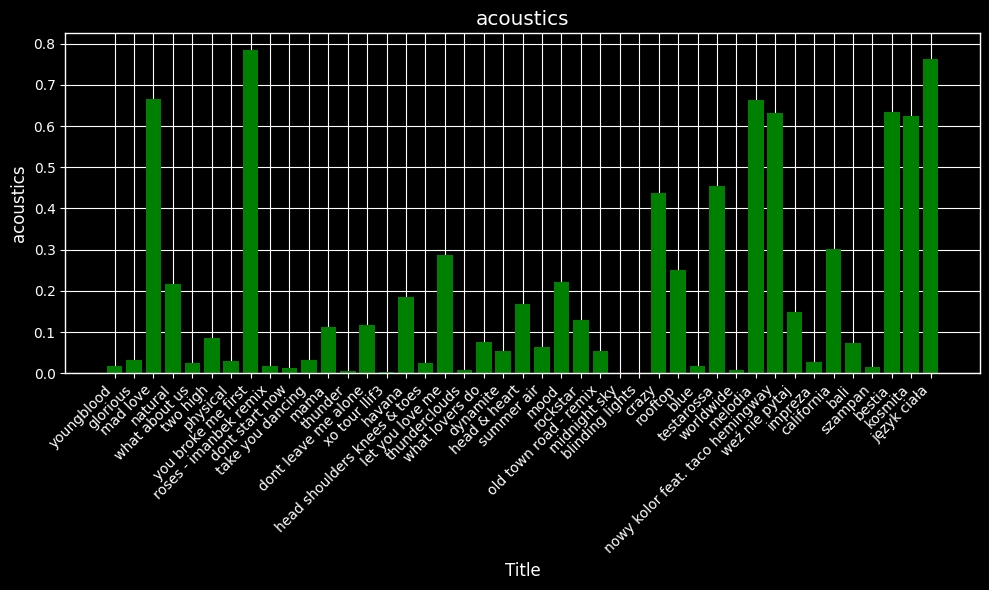

In [44]:
# acousticness  
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['acoustics'], color='green')
plt.xlabel('Title')
plt.ylabel('acoustics')
plt.title('acoustics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

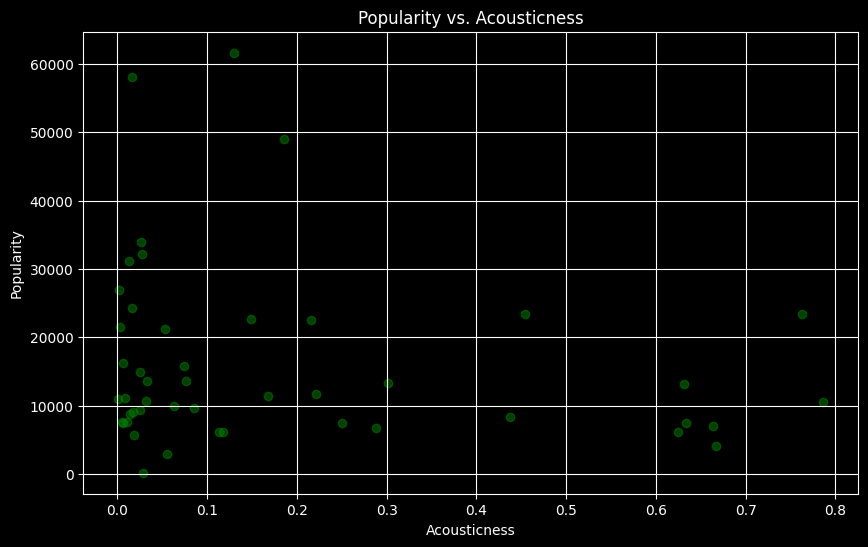

In [50]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['acoustics'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')

plt.grid(True)
plt.show() 

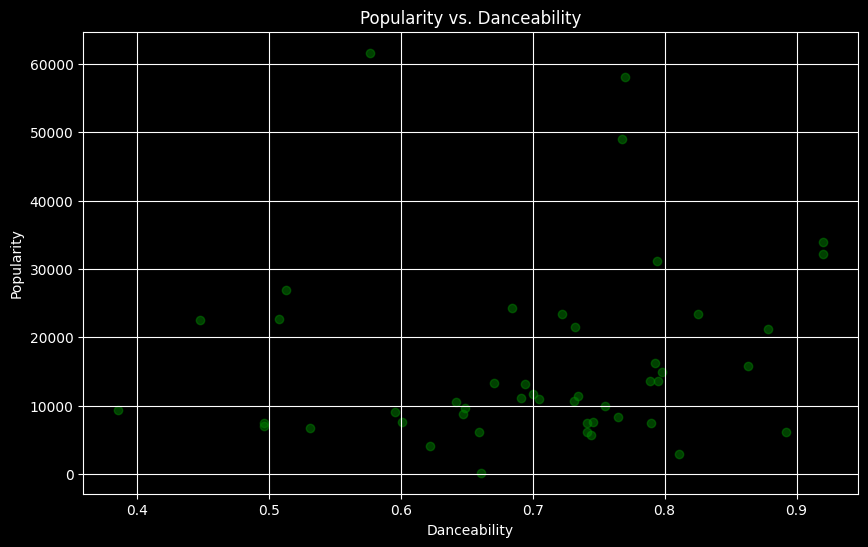

In [47]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['danceability'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.grid(True)
plt.show() 

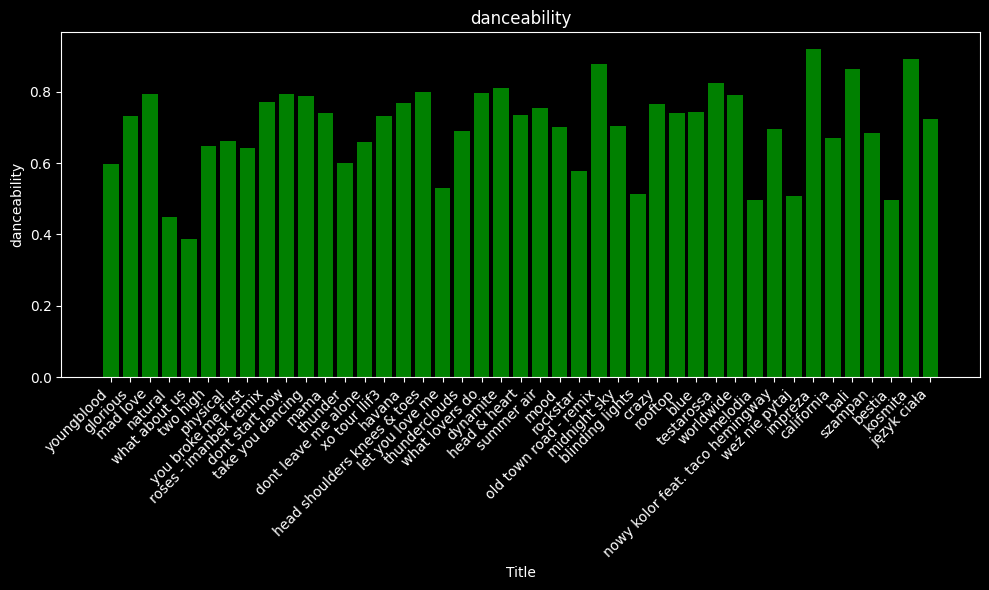

In [33]:
# danceability  
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['danceability'], color='green')
plt.xlabel('Title')
plt.ylabel('danceability')
plt.title('danceability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

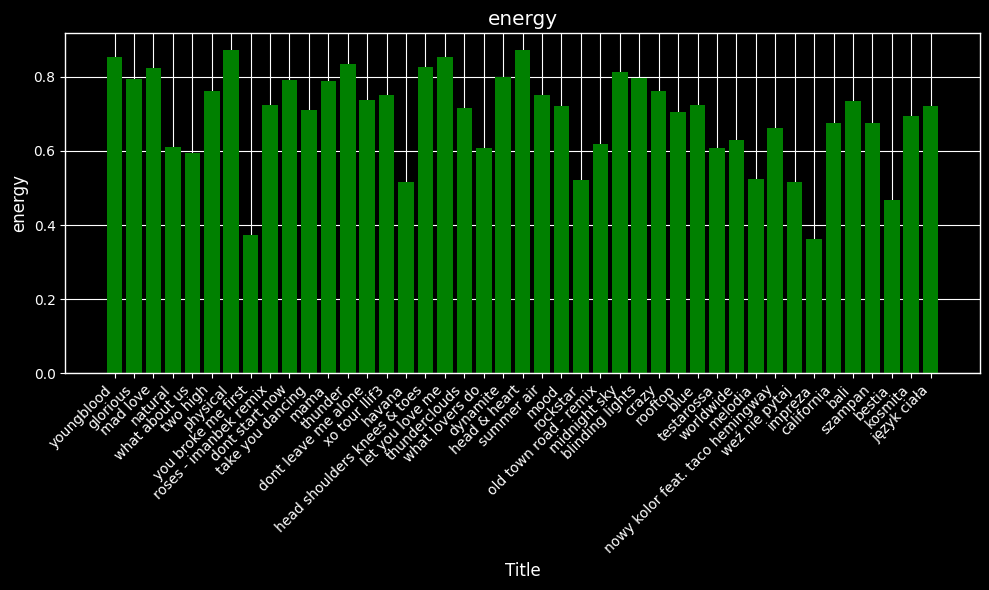

In [45]:
# energy
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['energy'], color='green')
plt.xlabel('Title')
plt.ylabel('energy')
plt.title('energy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

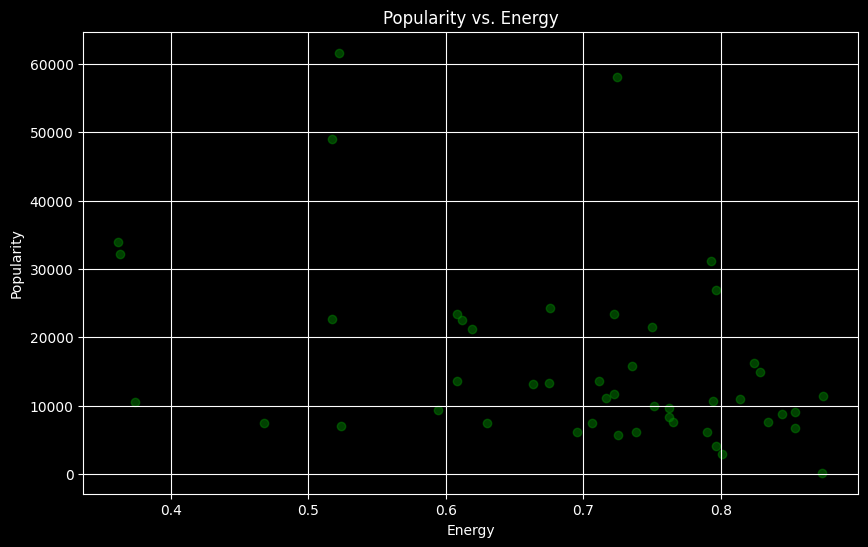

In [51]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['energy'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.grid(True)
plt.show() 

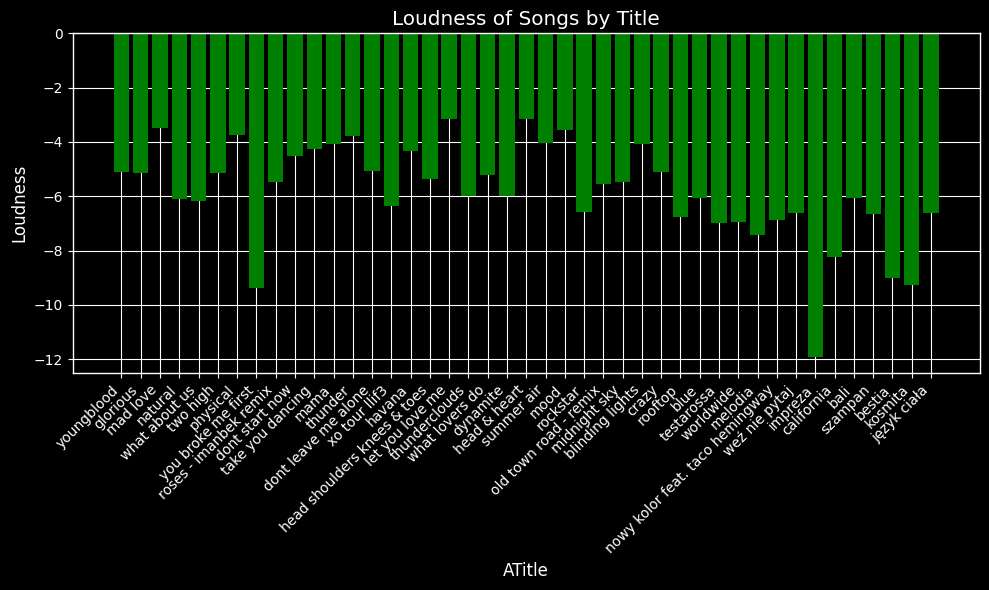

In [40]:

# loudness
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['loudness'], color='green')
plt.xlabel('ATitle')
plt.ylabel('Loudness')
plt.title('Loudness of Songs by Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

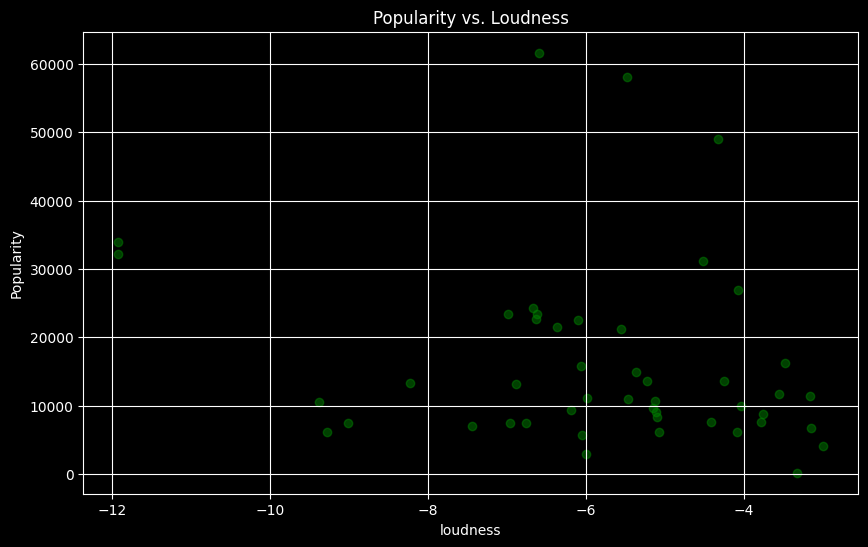

In [52]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['loudness'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Loudness')
plt.xlabel('loudness')
plt.ylabel('Popularity')

plt.grid(True)
plt.show() 

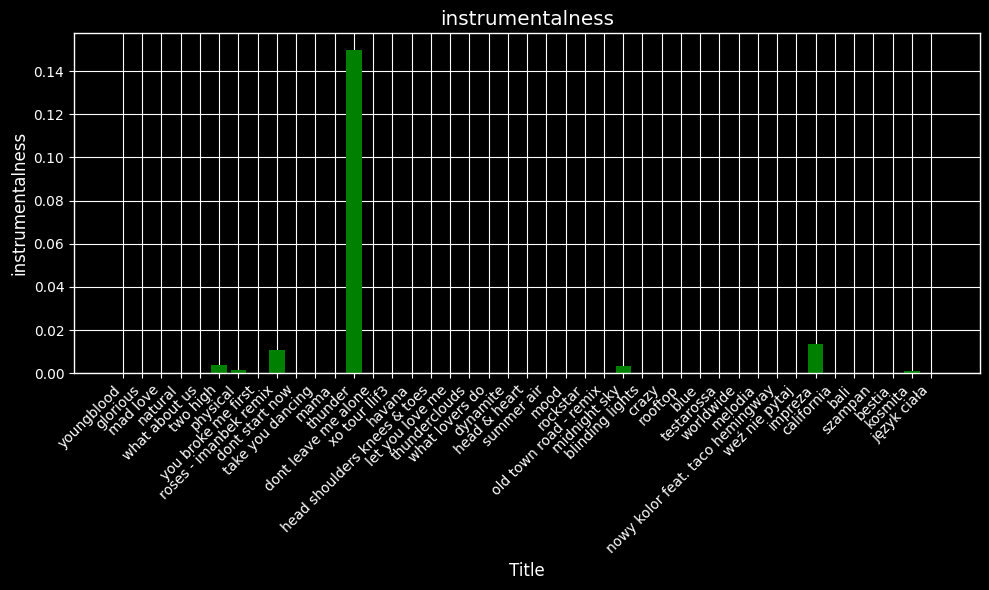

In [46]:
# instrumentalness  
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['instrumentalness'], color='green')
plt.xlabel('Title')
plt.ylabel('instrumentalness')
plt.title('instrumentalness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

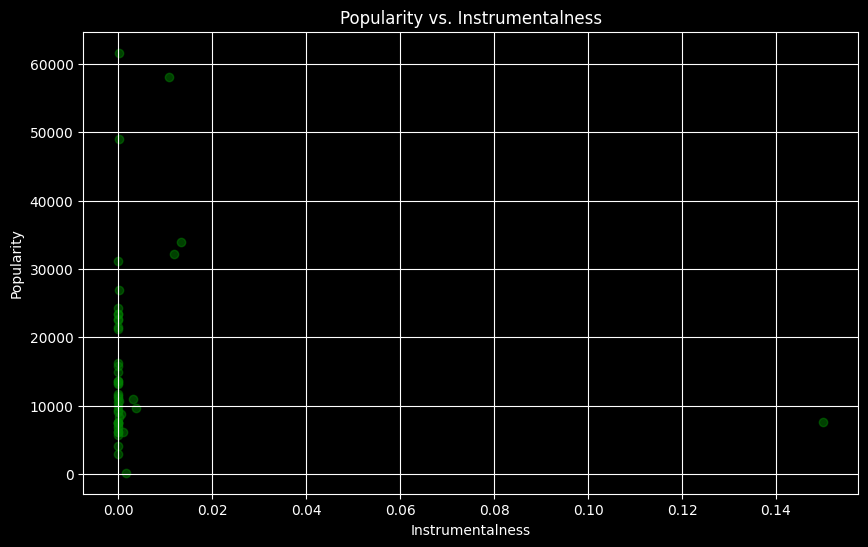

In [53]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['instrumentalness'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')

plt.grid(True)
plt.show() 

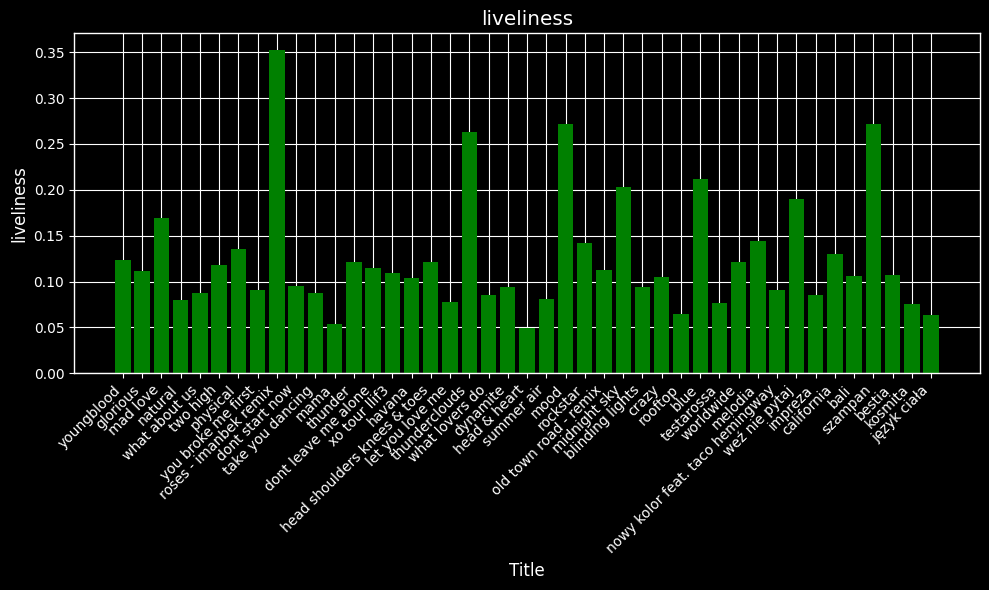

In [47]:
# liveliness
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['liveliness'], color='green')
plt.xlabel('Title')
plt.ylabel('liveliness')
plt.title('liveliness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

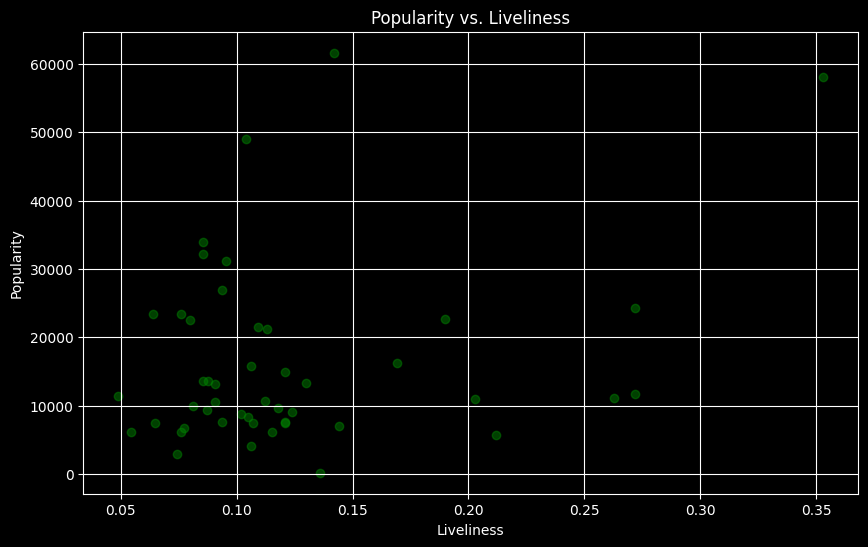

In [54]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['liveliness'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Liveliness')
plt.xlabel('Liveliness')
plt.ylabel('Popularity')

plt.grid(True)
plt.show()

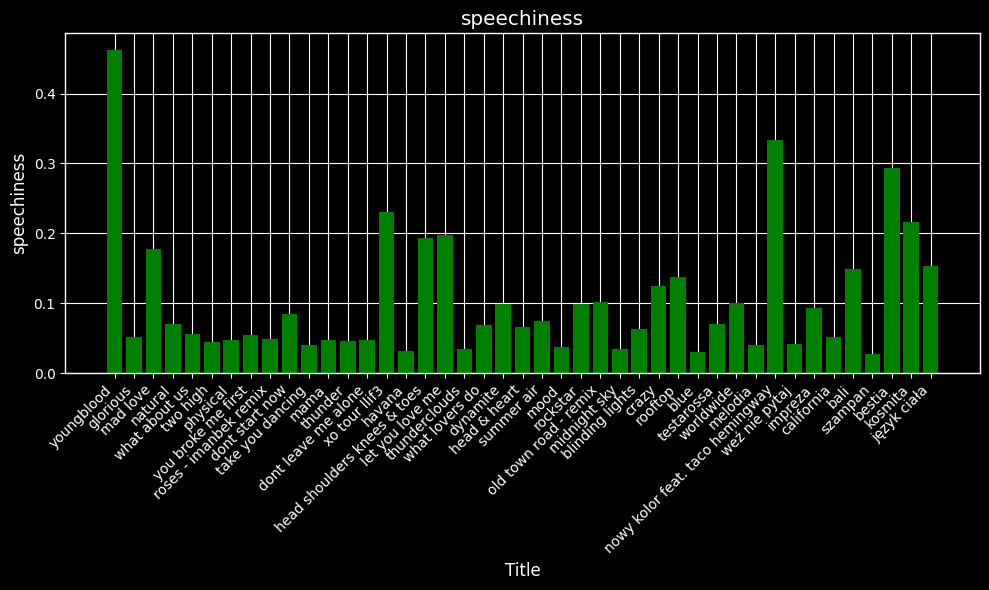

In [51]:
# speechiness
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(songs['Title'], songs['speechiness'], color='green')
plt.xlabel('Title')
plt.ylabel('speechiness')
plt.title('speechiness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

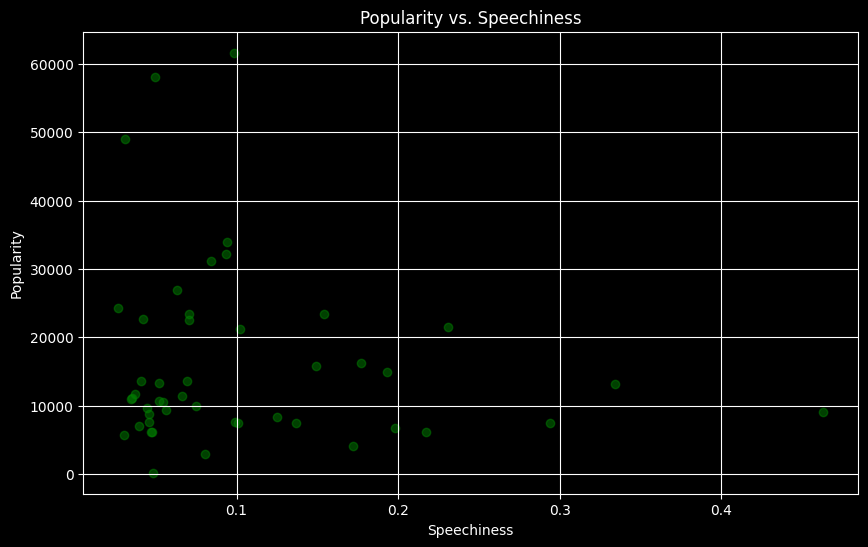

In [55]:
plt.figure(figsize=(10,6 ))
plt.scatter(songs['speechiness'], songs['Popularity'], color='green', alpha=0.5) 
plt.title('Popularity vs. Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')

plt.grid(True)
plt.show()

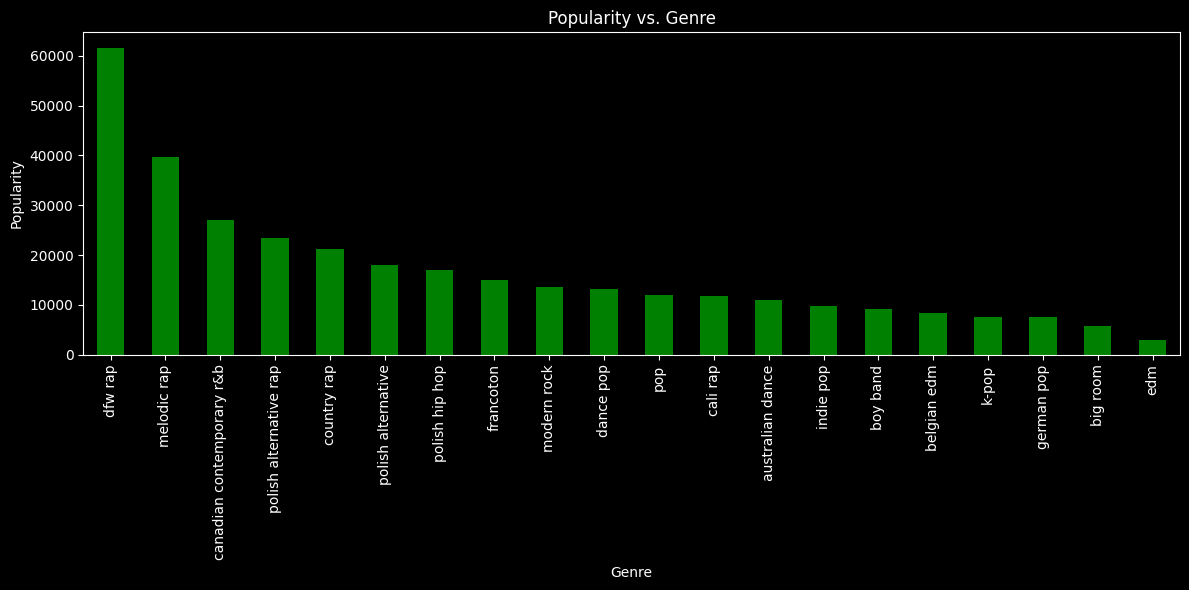

In [73]:
genre_popularity = songs.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)

# Utworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='green')
plt.title('Popularity vs. Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()